# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

In [ ]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?&units=metric&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ha'il
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | balabac
Processing Record 5 of Set 1 | colonia
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | kudymkar
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | kone
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | khanpur mahar
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | luanda
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | adamstown
Processing Record

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 
                                                  'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ha'il,27.5219,41.6907,22.01,37,0,1.03,SA,1697584405
1,fale old settlement,-9.3852,-171.2468,28.11,75,56,3.21,TK,1697584406
2,afaahiti,-17.7500,-149.2833,26.93,83,92,7.92,PF,1697584406
3,balabac,7.9868,117.0645,28.22,80,61,4.31,PH,1697584406
4,colonia,50.9333,6.9500,8.25,79,0,2.57,DE,1697584205


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("WeatherPy/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ha'il,27.5219,41.6907,22.01,37,0,1.03,SA,1697584405
1,fale old settlement,-9.3852,-171.2468,28.11,75,56,3.21,TK,1697584406
2,afaahiti,-17.7500,-149.2833,26.93,83,92,7.92,PF,1697584406
3,balabac,7.9868,117.0645,28.22,80,61,4.31,PH,1697584406
4,colonia,50.9333,6.9500,8.25,79,0,2.57,DE,1697584205


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

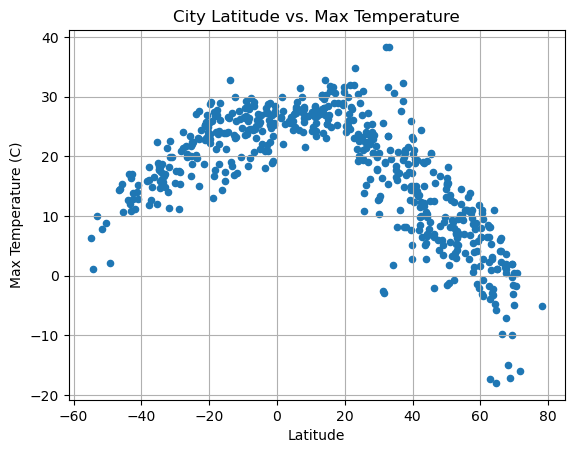

In [41]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat', 'Max Temp')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

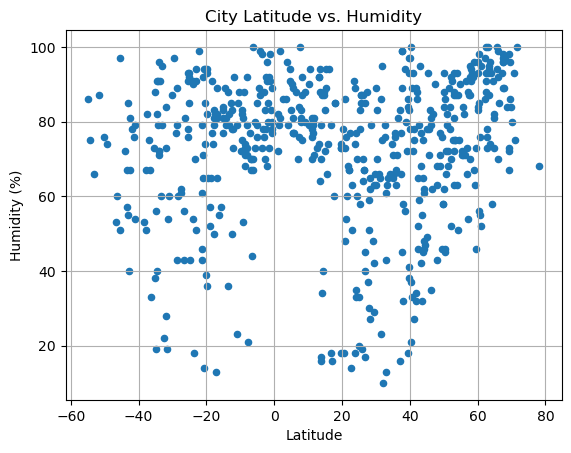

In [44]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

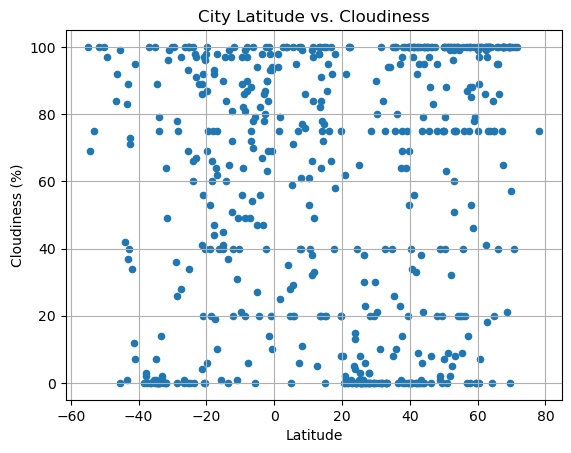

In [46]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

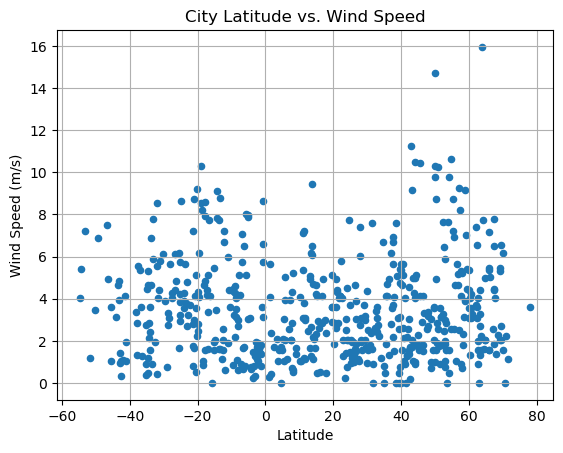

In [47]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ha'il,27.5219,41.6907,22.01,37,0,1.03,SA,1697584405
3,balabac,7.9868,117.0645,28.22,80,61,4.31,PH,1697584406
4,colonia,50.9333,6.9500,8.25,79,0,2.57,DE,1697584205
6,kudymkar,59.0173,54.6560,4.12,67,78,9.15,RU,1697584407
9,kodiak,57.7900,-152.4072,8.73,87,100,4.12,US,1697584407


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fale old settlement,-9.3852,-171.2468,28.11,75,56,3.21,TK,1697584406
2,afaahiti,-17.7500,-149.2833,26.93,83,92,7.92,PF,1697584406
5,grytviken,-54.2811,-36.5092,1.11,75,69,5.42,GS,1697584387
7,atafu village,-8.5421,-172.5159,28.39,73,99,3.13,TK,1697584407
8,kone,-21.0595,164.8658,25.82,71,56,2.97,NC,1697584407


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8519101536264424


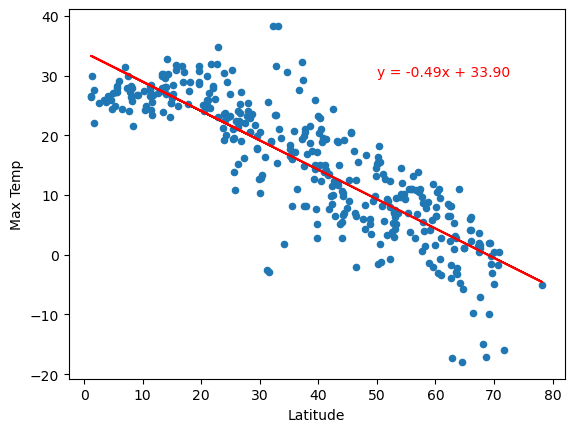

In [68]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter('Lat', 'Max Temp')
plt.xlabel('Latitude')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (50, 30), color = 'red')
print(f'The r-value is: {rvalue}')

The r-value is: 0.7637066817822454


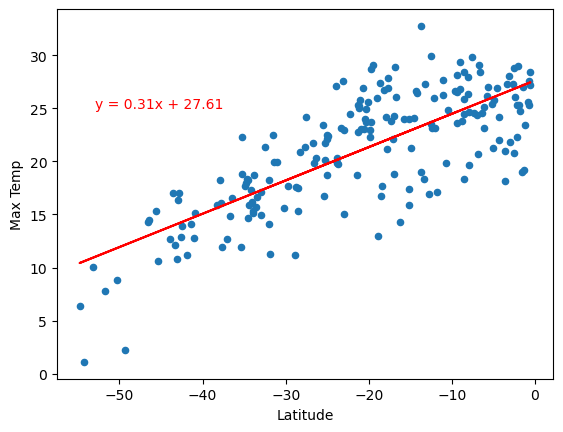

In [71]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter('Lat', 'Max Temp')
plt.xlabel('Latitude')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (-53, 25), color = 'red')
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16643091624771833


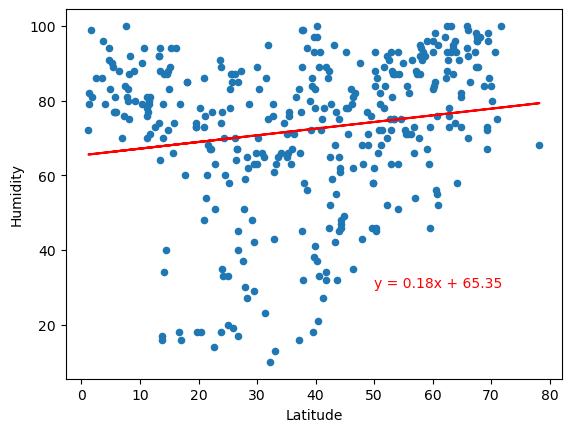

In [72]:
# Northern Hemisphere
northern_hemi_df.plot.scatter('Lat', 'Humidity')
plt.xlabel('Latitude')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (50, 30), color = 'red')
print(f'The r-value is: {rvalue}')

The r-value is: 0.2065322967696191


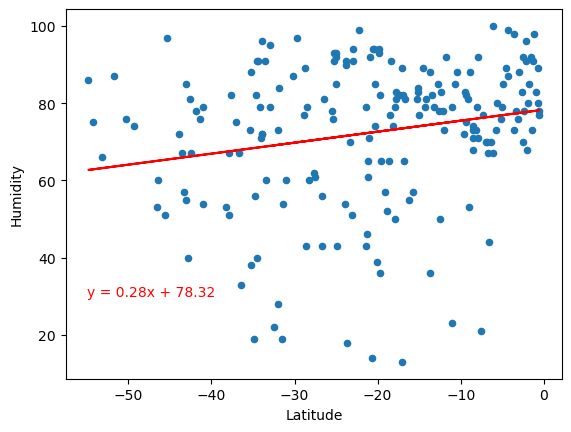

In [75]:
# Southern Hemisphere
southern_hemi_df.plot.scatter('Lat', 'Humidity')
plt.xlabel('Latitude')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (-55, 30), color = 'red')
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22475344678056638


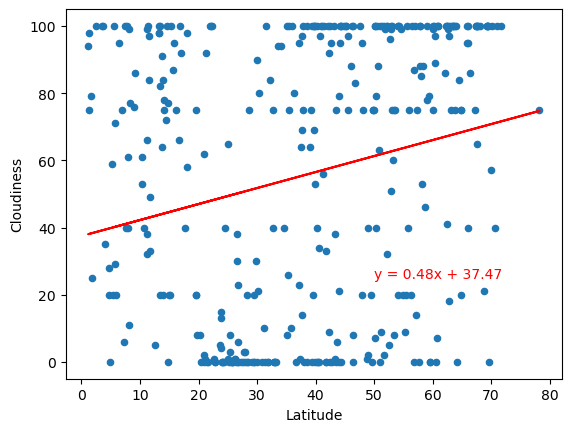

In [77]:
# Northern Hemisphere
northern_hemi_df.plot.scatter('Lat', 'Cloudiness')
plt.xlabel('Latitude')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (50, 25), color = 'red')
print(f'The r-value is: {rvalue}')

The r-value is: 0.19165445920465718


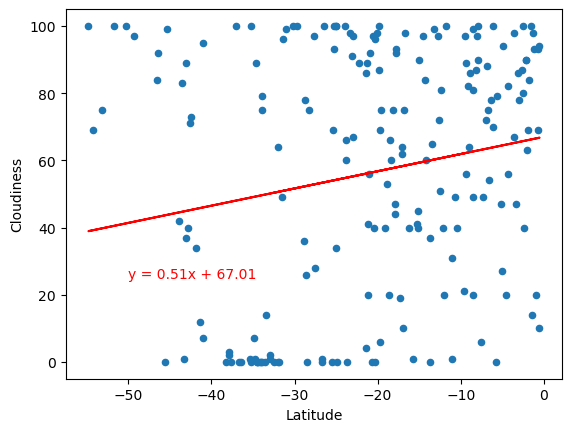

In [78]:
# Southern Hemisphere
southern_hemi_df.plot.scatter('Lat', 'Cloudiness')
plt.xlabel('Latitude')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (-50, 25), color = 'red')
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18408620148504035


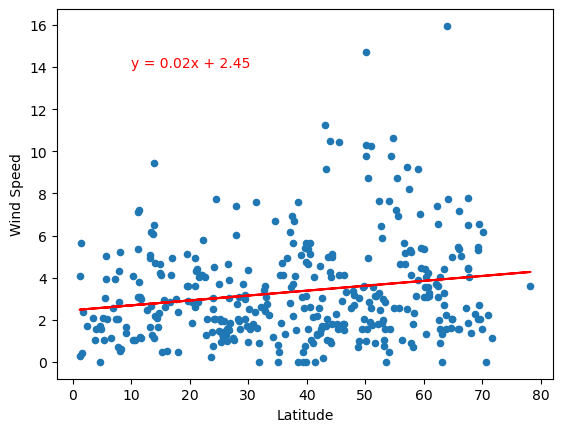

In [80]:
# Northern Hemisphere
northern_hemi_df.plot.scatter('Lat', 'Wind Speed')
plt.xlabel('Latitude')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (10, 14), color = 'red')
print(f'The r-value is: {rvalue}')

The r-value is: -0.06878713654412856


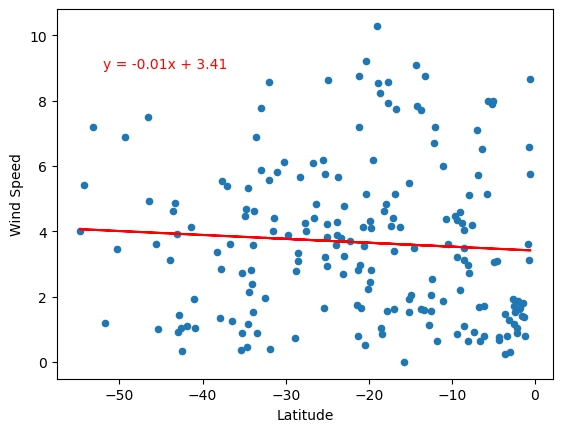

In [84]:
# Southern Hemisphere
southern_hemi_df.plot.scatter('Lat', 'Wind Speed')
plt.xlabel('Latitude')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, slope * x + intercept, color = 'red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy = (-52, 9), color = 'red')
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE